## Springpot

In [1]:
using RHEOS
using PyPlot

┌ Info: Recompiling stale cache file /home/ab2425/.julia/compiled/v1.1/RHEOS/8Ut5K.ji for RHEOS [728860ae-c896-11e8-0b91-0f38ecad5046]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /home/ab2425/.julia/compiled/v1.1/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1184


By typing the name of the model, it is possible to visualise its graphical representation and its parameters. 

In [2]:
Springpot


Model name: springpot

Free parameters: cᵦ and β

                ____ ╱╲ ____
                     ╲╱  cᵦ, β
                

### Consitutive equation

$\sigma(t) = c_{\beta} \frac{d^\beta \epsilon(t)}{dt^\beta}$ for $0 \leq \beta \leq 1$

### Relaxation modulus

$G(t) = \frac{c_{\beta} }{\Gamma(1-\beta)} t^{-\beta}$ 

### Creep modulus

$J(t) = \frac{1}{c_\beta \Gamma(1+\beta)}t^\beta$ 

### Storage modulus

$G^{\prime}(\omega) = c_\beta \omega^\beta \cos(\frac{\pi}{2}\beta)$

### Loss modulus

$G^{\prime\prime}(\omega) = c_\beta \omega^\beta \sin(\frac{\pi}{2}\beta)$

## Spring

When $\beta = 0$ the springpot specialises to a spring

In [3]:
Spring


Model name: spring

Free parameters: k

                ___╱╲  ╱╲  ╱╲  ________
                     ╲╱  ╲╱  ╲╱  k
                

## Dashpot

When $\beta = 1$ the springpot specialises to a dashpot

In [4]:
Dashpot


Model name: dashpot

Free parameters: η

                 ___
             _____| |_____
                 _|_|
                     η
                

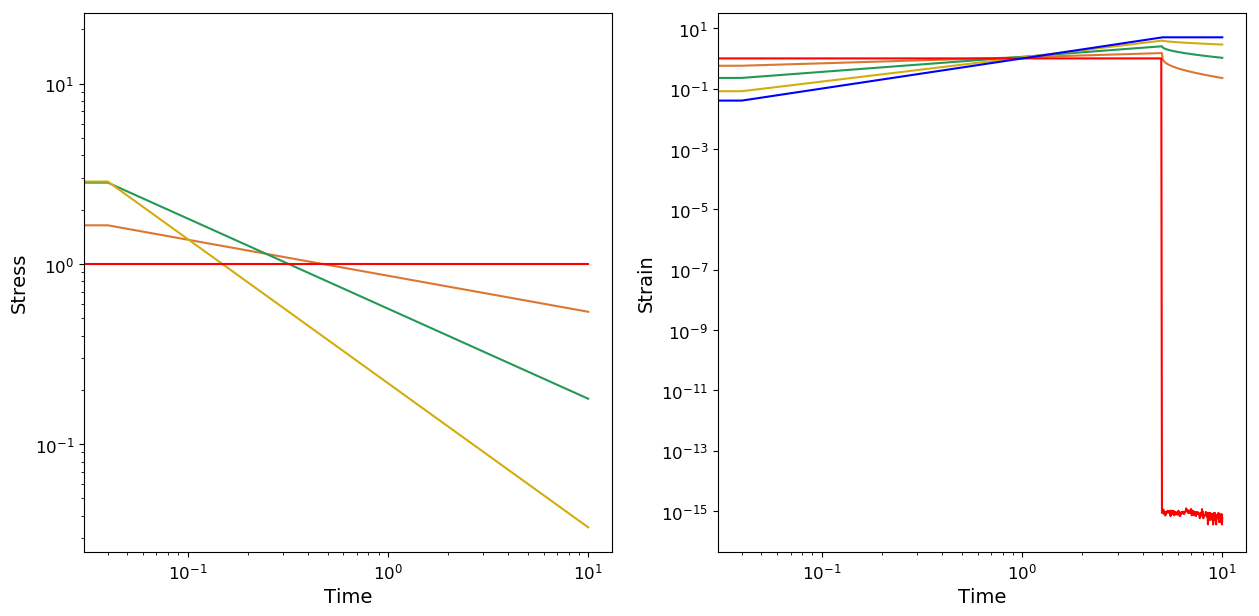

In [15]:
# Create a time only dataset
dϵ = timeline()
dσ = timeline()

# calculate a strain/stress data by appling a function of time (by defalut a unit step otherwise substitute hstep(amp = 2.))
dϵ = strainfunction(dϵ, hstep())
dσ = stressfunction(dσ, hstep()) - stressfunction(dσ, hstep(offset = 5.0))

colplot = ["#dc7633", "#229954", "#d4ac0d"]

fig, ax = subplots(1,2, figsize=(15,7))


# plot moduli for varying β
for (i,beta) in enumerate([0.2, 0.5, 0.8])
    
    springpot_model = RheoModel(Springpot,(cᵦ = 1.0, β = beta))
    
    #Relaxation modulus
    dG_springpot = modelpredict(dϵ, springpot_model)
    ax[1].loglog(dG_springpot.t, dG_springpot.σ, color=colplot[i])
    
    # Creep modulus
    dJ_springpot = modelpredict(dσ, springpot_model)
    ax[2].loglog(dJ_springpot.t, dJ_springpot.ϵ, color=colplot[i])
 
end

# SPRING
spring_model = RheoModel(Spring, (k = 1.0,))

#Relaxation modulus
dG_spring = modelpredict(dϵ, spring_model)
ax[1].plot(dG_spring.t, dG_spring.σ, color = "red");

# Creep modulus
dJ_spring = modelpredict(dσ, spring_model)
ax[2].plot(dJ_spring.t, dJ_spring.ϵ, color = "red");

# DASHPOT
dashpot_model = RheoModel(Dashpot, (η = 1.0,))

# Creep modulus
dJ_dashpot = modelpredict(dσ, dashpot_model)
ax[2].plot(dJ_dashpot.t, dJ_dashpot.ϵ, color = "blue");

ax[1].set_xlabel("Time", fontsize = 14);
ax[1].set_ylabel("Stress", fontsize = 14);
ax[1].tick_params("both", labelsize=12);
#ax[1].set_ylim(bottom=0.0, top= 2.0);

ax[2].set_xlabel("Time", fontsize = 14);
ax[2].set_ylabel("Strain", fontsize = 14);
ax[2].tick_params("both", labelsize=12);

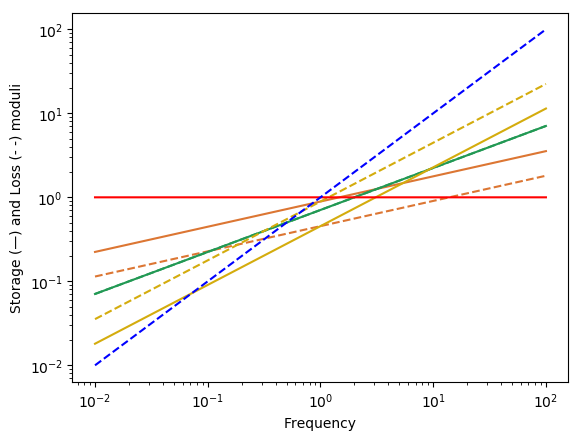

In [6]:
dω = frequencyspec()

colplot = ["#dc7633", "#229954", "#d4ac0d"]

# plot moduli for varying β
for (i,beta) in enumerate([0.3, 0.5, 0.7])
    
    springpot_model = RheoModel(Springpot,(cᵦ = 1.0, β = beta))
    
    # Storage and Loss moduli
    d_springpot = dynamicmodelpredict(dω, springpot_model)
    loglog(d_springpot.ω, d_springpot.Gp, color=colplot[i], "-")
    loglog(d_springpot.ω, d_springpot.Gpp, color=colplot[i], "--")
end

# SPRING
spring_model = RheoModel(Spring, (k = 1.0,))
d_spring = dynamicmodelpredict(dω, spring_model)
loglog(d_spring.ω, d_spring.Gp, "-", color = "red")

# DASHPOT
dashpot_model = RheoModel(Dashpot, (η = 1.0,))
d_dashpot = dynamicmodelpredict(dω, dashpot_model)
loglog(d_dashpot.ω, d_dashpot.Gpp, "--", color = "blue")

xlabel("Frequency");
ylabel("Storage (—) and Loss (- -) moduli");